In [1]:
import tensorflow as tf
import os

In [2]:
import cv2
import imghdr

In [3]:
data_dir = 'Downloads/data' 
print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Users\LENOVO


In [4]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [5]:
if not os.path.exists(data_dir):
    print(f"Directory '{data_dir}' does not exist.")
    exit() 

In [6]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
data = tf.keras.utils.image_dataset_from_directory('Downloads/data')

Found 305 files belonging to 2 classes.


In [20]:
data_iterator = data.as_numpy_iterator()

In [22]:
batch = data_iterator.next()

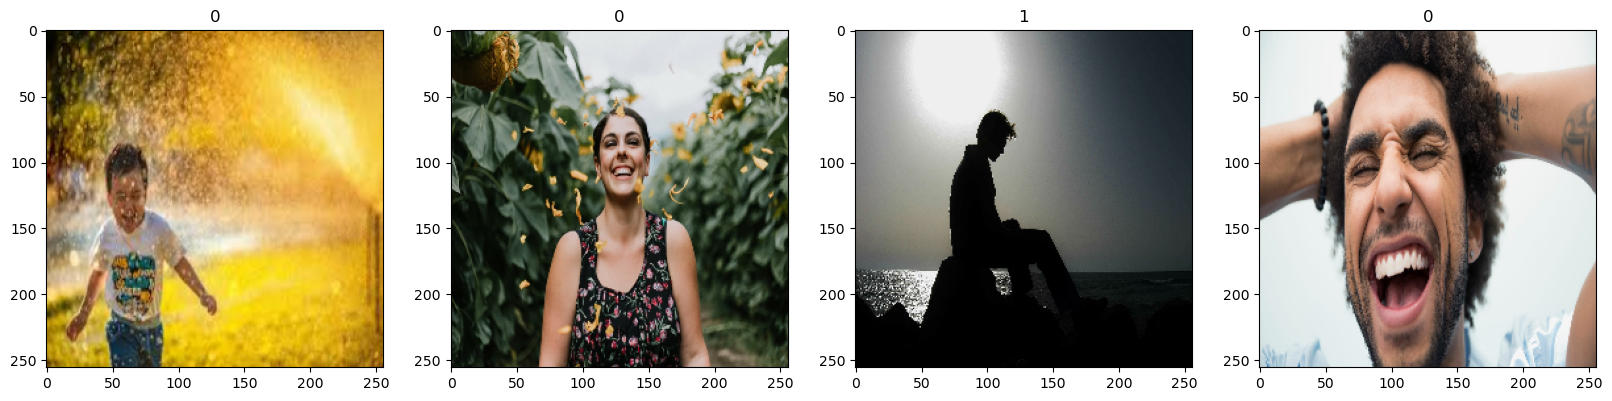

In [24]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [26]:
data = data.map(lambda x,y: (x/255, y))

In [28]:
data.as_numpy_iterator().next()

(array([[[[0.81421566, 0.8691176 , 0.8730392 ],
          [0.819244  , 0.874146  , 0.874146  ],
          [0.8240196 , 0.87892157, 0.87892157],
          ...,
          [0.8779412 , 0.9137255 , 0.9098039 ],
          [0.8714729 , 0.906767  , 0.90284544],
          [0.8612745 , 0.90343136, 0.90588236]],
 
         [[0.81758195, 0.8724839 , 0.8764055 ],
          [0.8222618 , 0.87716377, 0.87716377],
          [0.82783014, 0.8827321 , 0.8827321 ],
          ...,
          [0.88059515, 0.91637945, 0.9124579 ],
          [0.8745098 , 0.9098039 , 0.90588236],
          [0.86519605, 0.9073529 , 0.9098039 ]],
 
         [[0.8156863 , 0.87058824, 0.87058824],
          [0.8235294 , 0.8784314 , 0.8784314 ],
          [0.8279412 , 0.88284314, 0.88284314],
          ...,
          [0.8745098 , 0.9137255 , 0.9098039 ],
          [0.8745098 , 0.9137255 , 0.9098039 ],
          [0.8730392 , 0.9044118 , 0.9137255 ]],
 
         ...,
 
         [[0.7497281 , 0.8242379 , 0.85168886],
          [0.74736

In [30]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [32]:
train_size

7

In [34]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [36]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [40]:
model = Sequential()

In [42]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\LENOVO\anaconda3\envs\tf\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
logdir='logs'

In [50]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [52]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5127 - loss: 0.7405 - val_accuracy: 0.5469 - val_loss: 0.6414
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.5873 - loss: 0.6636 - val_accuracy: 0.6719 - val_loss: 0.5501
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.6979 - loss: 0.5279 - val_accuracy: 0.8594 - val_loss: 0.3554
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.7936 - loss: 0.4105 - val_accuracy: 0.8125 - val_loss: 0.3847
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - accuracy: 0.8213 - loss: 0.3639 - val_accuracy: 0.9062 - val_loss: 0.3068
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9208 - loss: 0.2293 - val_accuracy: 0.8125 - val_loss: 0.3366
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8929 - loss: 0.2511 - val_accuracy: 0.9531 - val_loss: 0.1756
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9396 - loss: 0.1551 - val_accuracy: 0.9531 - val_loss: 0.1032
Epoch 9/

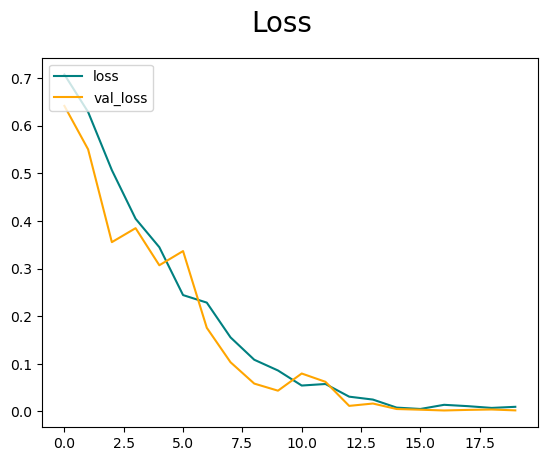

In [54]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

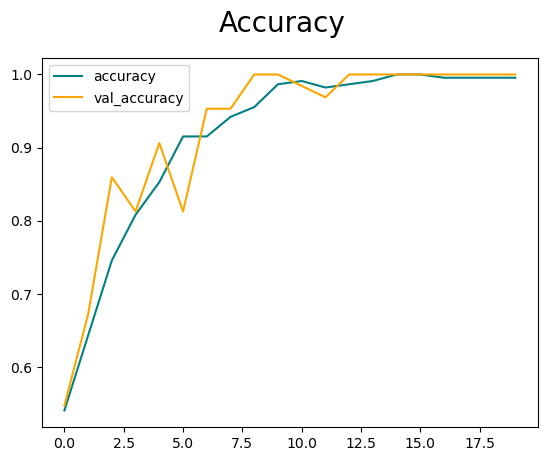

In [56]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [58]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [60]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [62]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step


In [64]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [66]:
import cv2

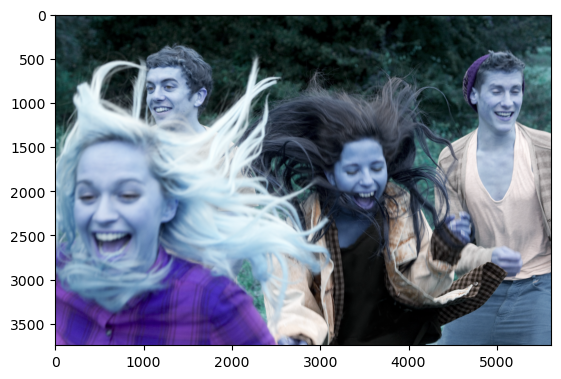

In [90]:
img = cv2.imread('Downloads/data/happy/154006829.jpg')
plt.imshow(img)
plt.show()

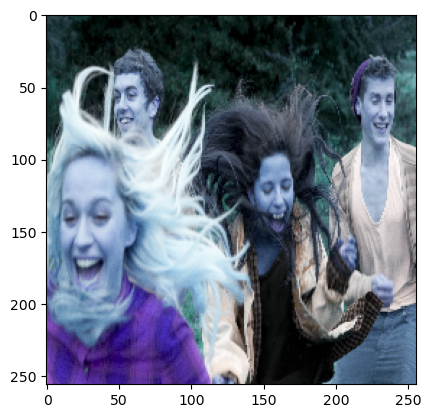

In [92]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [94]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step


In [96]:
yhat

array([[0.09882755]], dtype=float32)